In [16]:
# these are the imports we'll be using
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize
import glob
import matplotlib.pyplot as plt
import numpy as np
import book
import pandas
from scipy.interpolate import interp1d
plt.style.use('seaborn-white')

In [2]:
# read in all the novels in the postmodern corpus
postmodern = []

for filename in glob.glob('postmodern/*.txt'):
    try:
        postmodern.append(book.makebook(open(filename, 'r')))
    except Exception as e:
        print(book)
        
postmodern.sort(key=lambda x: x.year)

In [3]:
# word tokenize all the books we read in in the previous block
postmodern_words = []

for book in postmodern:
    postmodern_words.append(word_tokenize(book.text.strip())) # strip removes string escapes
    
# now we'll make sure that things look like they were done correctly
postmodern_words[5][:6]

['A', 'SCREAMING', 'COMES', 'ACROSS', 'THE', 'SKY']

In [4]:
con_score = pandas.read_csv('concreteness.csv')

#transposes, then converts to ndarray
con_score = con_score[['Word','Conc.M']].sort_values(by='Word').T.values

def get_score(word):
    try:
        return con_score[1][int(np.where(con_score == word)[1])]
    except:
        return np.nan

# should return 5.0
get_score('bat')

5.0

In [5]:
a = []
samplesize = 500

for book in postmodern_words:
    a.append(np.nanmean(np.array([get_score(word) for word in np.random.choice(book,samplesize)])))


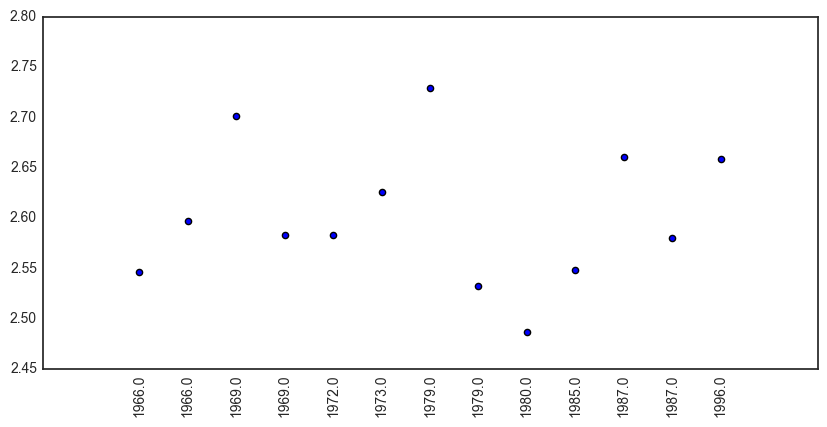

2.60239697487


In [6]:
dates = [book.year for book in postmodern]
x = np.arange(len(dates))
y = np.array(a)
xlabel = dates

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211)
ax.scatter(x,y)
plt.xticks(x, dates, rotation='vertical')
plt.show()
print(np.mean(a))

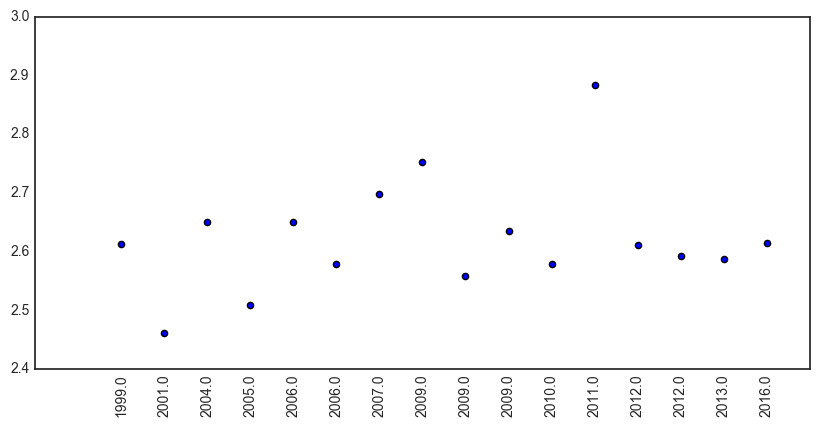

2.62293634765


In [17]:
post911 = []
a = []

for filename in glob.glob('post911/*.txt'):
    try:
        post911.append(book.makebook(open(filename, 'r')))
    except Exception as e:
        print(book)

post911_words = []

for book in post911:
    post911_words.append(word_tokenize(book.text.strip())) 
    
post911.sort(key=lambda x: x.year)

for book in post911_words:
    a.append(np.nanmean(np.array([get_score(word) for word in np.random.choice(book,samplesize)])))

dates = [book.year for book in post911]
x = np.arange(len(dates))
y = np.array(a)
xlabel = dates

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211)
ax.scatter(x,y)
plt.xticks(x, dates, rotation='vertical')
plt.show()
print(np.mean(a))